In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [104]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/diabetes.csv')
print(df.columns)
print(df.eq(0).sum())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


## 여러 feature에 일부 행이 0 값을 가지고 있는 것을 발견하여, 해당 데이터를 처리하기 위한 전처리 단계를 추가하였습니다

In [107]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age',]
for col in cols:
    mean_value = df[col][df[col] != 0].mean()
    df[col] = df[col].replace(0, mean_value)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168,43.1,2.288,33,1


In [109]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

Text(0.5, 1.0, 'Outcome')

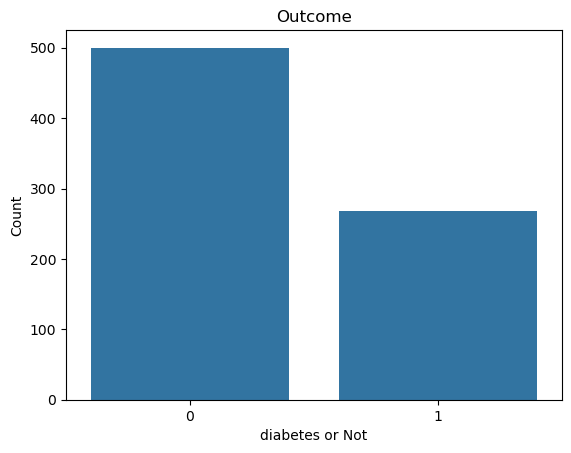

In [111]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [113]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

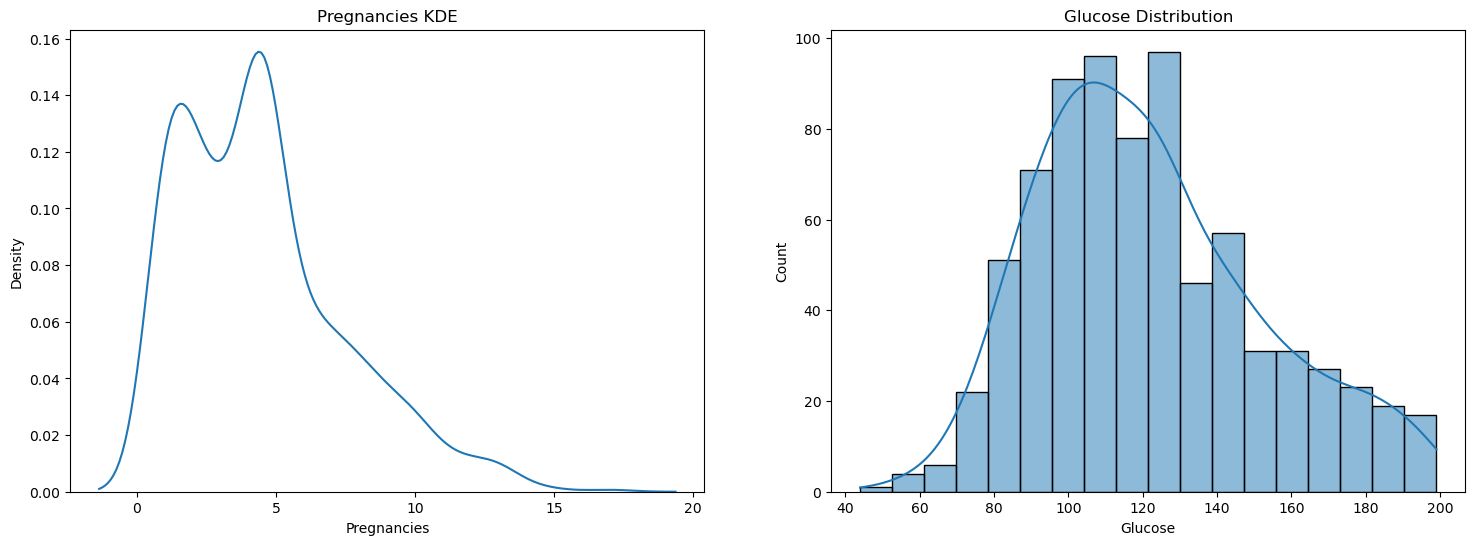

In [115]:
figure = plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(df['Pregnancies'], ax=ax1)
ax1.set_title('Pregnancies KDE')

ax2 = plt.subplot(1, 2, 2)
sns.histplot(df['Glucose'], kde=True, ax=ax2)  
ax2.set_title('Glucose Distribution')

plt.show()

In [117]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

D:\Tool File\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

model_history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = y_test 

y_pred_class = (y_pred > 0.5).astype(int).flatten()

print("y_test_class:", y_test_class)
print("y_pred_class:", y_pred_class)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3779 - loss: 24.4785 - val_accuracy: 0.6948 - val_loss: 4.1417
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6058 - loss: 3.5863 - val_accuracy: 0.5260 - val_loss: 1.5548
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6104 - loss: 1.4111 - val_accuracy: 0.5519 - val_loss: 1.2357
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6510 - loss: 1.1303 - val_accuracy: 0.6234 - val_loss: 1.0236
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.9878 - val_accuracy: 0.6883 - val_loss: 1.0583
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6503 - loss: 1.2385 - val_accuracy: 0.6688 - val_loss: 0.9263
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6426 - loss: 0.9836 - val_accuracy: 0.6299 - val_loss: 0.7414
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6231 - loss: 0.7892 - val_accuracy: 0.5779 - val_los

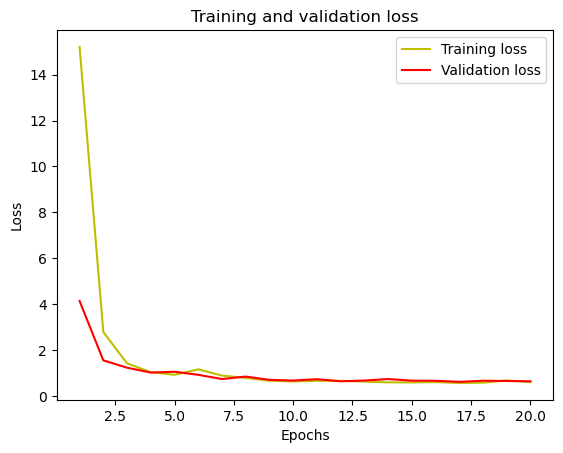

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

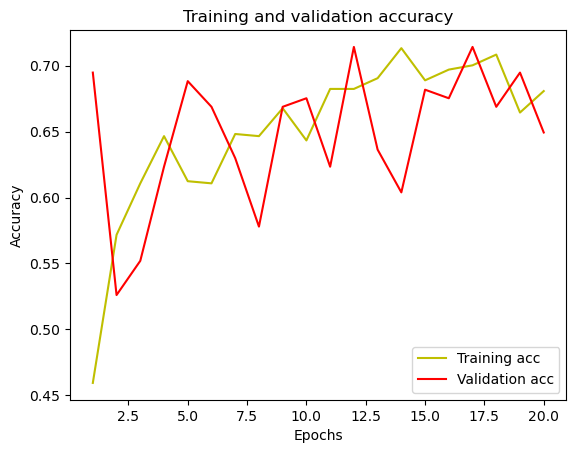

In [123]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [125]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       107
           1       0.43      0.43      0.43        47

    accuracy                           0.65       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.65      0.65      0.65       154

[[80 27]
 [27 20]]


In [127]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6665 - loss: 0.6089


[0.6431175470352173, 0.649350643157959]